In [46]:
import random
import pandas as pd
import numpy as np

In [47]:
param_step_limits = {
    'pressure_ST_100': (0.5, 0.8),
    'pressure_ST_200': (0.3, 0.6),
    'pressure_ST_300': (0.5, 0.8),
    'pressure_ST_400': (0.3, 0.6),
    'pressure_ST_500': (0.5, 0.8),
    'pressure_ST_600': (0.3, 0.6),
    'pressure_ST_700': (0.5, 0.8),
    'pressure_ST_800': (0.3, 0.6),
    'pressure_ST_900': (0.5, 0.8),
    'pressure_ST_1000': (0.3, 0.6),
    'temp_ST_100': (110, 140),
    'temp_ST_200': (130, 175),
    'temp_ST_300': (110, 140),
    'temp_ST_400': (130, 175),
    'temp_ST_500': (110, 140),
    'temp_ST_600': (130, 175),
    'temp_ST_700': (110, 140),
    'temp_ST_800': (130, 175),
    'temp_ST_900': (110, 140),
    'temp_ST_1000': (130, 175),
    'voltage_ST_100': (0, 1),
    'voltage_ST_200': (0, 0),
    'voltage_ST_300': (0, 1),
    'voltage_ST_400': (0, 0),
    'voltage_ST_500': (0, 1),
    'voltage_ST_600': (0, 0),
    'voltage_ST_700': (0, 1),
    'voltage_ST_800': (0, 0),
    'voltage_ST_900': (0, 1),
    'voltage_ST_1000': (0, 0)
}

In [48]:
# sample list of tools
tools = ['TOOL_1', 'TOOL_2', 'TOOL_3', 'TOOL_4', 'TOOL_5', 'TOOL_6', 'TOOL_7', 'TOOL_8', 'TOOL_9', 'TOOL_10']

In [49]:
# list comprehension to generate 100 lots that are two random letters followed by three random numbers and a .1
lots = [
        ''.join(random.choices('ABCDEFGHIJKLMNOPQRSTUVWXYZ', k=2))
        + ''.join(random.choices('0123456789', k=3))
        + '.1' for _ in range(100)
    ]

In [50]:
# list of wafers from 1 to 25, ch_steps and params
wafers = [x for x in range(1, 26)]
ch_steps = ['ST_100', 'ST_200', 'ST_300', 'ST_400', 'ST_500', 'ST_600', 'ST_700', 'ST_800', 'ST_900', 'ST_1000']
params = ['pressure', 'temp', 'voltage']

In [51]:
def generate_single_value(target_value, lower_limit, upper_limit, error_rate):
    """
    Generates a single random floating-point number within specified limits,
    with a possibility of being outside the range to simulate errors.

    Args:
        target_value (float): Target value for the generated number (not used in current implementation).
        lower_limit (float): The lower limit of the value range.
        upper_limit (float): The upper limit of the value range.
        error_rate (float): The probability of generating an out-of-bounds value.

    Returns:
        float: A generated floating-point number rounded to five decimal places.
    """
    if random.random() < error_rate:
        if random.random() < 0.5:
            # Generate an out-of-bounds value (either below lower_limit or above upper_limit)
            return round(random.uniform(upper_limit, upper_limit + (upper_limit - lower_limit) * 0.1), 5)
        else:
            return round(random.uniform(lower_limit - (upper_limit - lower_limit) * 0.1, lower_limit), 5)
    else:
        # Generate a value close to the target_value
        deviation = (upper_limit - lower_limit) * 0.05  # 5% deviation
        return round(random.uniform(max(lower_limit, target_value - deviation), min(upper_limit, target_value + deviation)), 5)

In [52]:
# def generate_one_wafer_data():

#     wafer_dict = {
#         'tool': random.choice(tools),
#         'lot': random.choice(lots),
#         'wafer': random.choice(wafers),
#     }

#     for param in params:
#         for step in ch_steps:
#             param_step = param + '_' + step

#             upper_limit = param_step_limits[param_step][1]
#             lower_limit = param_step_limits[param_step][0]
#             target = (upper_limit + lower_limit) / 2
            
#             # add to dictionary generating a single value for each parameter step
#             wafer_dict[param_step] = generate_single_value(
#                 target_value=target,
#                 lower_limit=lower_limit,
#                 upper_limit=upper_limit,
#                 error_rate=0.03
#             )

#     return wafer_dict

In [53]:
from typing import List

def generate_series(target_value: float, lower_limit: float, upper_limit: float, error_rate: float, size: int = 100) -> List[float]:
    """
    Generates a list of random floating-point numbers within specified limits, 
    with some values outside of the range to simulate errors.

    Args:
        target_value (float): Target value for the generated series.
        lower_limit (float): The lower limit of the value range.
        upper_limit (float): The upper limit of the value range.
        error_rate (float): The probability of generating an out-of-bounds value.
        size (int, optional): The number of values to generate. Default is 100.

    Returns:
        List[float]: A list of generated floating-point numbers.
    """
    series = []
    for _ in range(size):
        if random.random() < error_rate:
            # Generate an out-of-bounds value (either below lower_limit or above upper_limit)
            if random.random() < 0.5:
                series.append(random.uniform(upper_limit, upper_limit + (upper_limit - lower_limit) * 0.1))
            else:
                series.append(random.uniform(lower_limit - (upper_limit - lower_limit) * 0.1, lower_limit))
        else:
            # Generate a value close to the target_value
            deviation = (upper_limit - lower_limit) * 0.05  # 5% deviation
            series.append(random.uniform(target_value - deviation, target_value + deviation))
    return series

In [54]:
def generate_dataframe(params: list, steps: list, error_rate: float = 0.03, size: int = 100):
    """
    Generates a pandas DataFrame with columns of values for given parameter steps.

    Args:
        params (list): The list of parameter names.
        steps (list): The list of step names.
        error_rate (float, optional): The probability of generating an out-of-bounds value. Default is 0.03.
        size (int, optional): The number of values to generate. Default is 100.

    Returns:
        pandas.DataFrame: A DataFrame with columns of generated values.
    """
    data = {}
    for param in params:
        for step in steps:
            upper_limit, lower_limit = param_step_limits[param + '_' + step]
            target = (upper_limit + lower_limit) / 2
            series = generate_series(
                target_value=target,
                lower_limit=lower_limit,
                upper_limit=upper_limit,
                error_rate=error_rate,
                size=size
            )
            data[param + '_' + step] = series
    return pd.DataFrame(data)

In [55]:
# upper limit is 0.8 and lower limit is 0.5 so target for this one will be 0.65
test = generate_dataframe(params=params, steps=ch_steps, error_rate=0.01, size=100)

In [56]:
import matplotlib.pyplot as plt

def plot_scatter(df, column_name, ymin=None, ymax=None):
    """
    Plots a scatter plot for the values in the specified column of the dataframe.

    Args:
        df (pandas.DataFrame): The dataframe containing the data.
        column_name (str): The name of the column to plot.
        ymin (float, optional): The minimum value for the y-axis. Default is None.
        ymax (float, optional): The maximum value for the y-axis. Default is None.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[column_name], alpha=0.5)
    plt.title(f'Scatter Plot of {column_name}')
    plt.xlabel('Index')
    plt.ylabel(column_name)
    if ymin is not None and ymax is not None:
        plt.ylim(ymin, ymax)
    plt.grid(True)
    plt.show()

In [ ]:
column_dict = {
    'STEP1_press_avg': [20.0, 19.9, 20.0],
    'STEP2_press_avg': [15.0, 14.9, 15.0],
    'STEP3_press_avg': [50.0, 49.6, 49.8],
    'STEP4_press_avg': [30.0, 30.0, 30.0],
    'STEP5_press_avg': [100.0, 100.0, 100.0],
    'STEP6_press_avg': [59.8, 59.4, 59.6],
    'STEP7_press_avg': [70.0, 69.9, 70.0],
    'STEP8_press_avg': [40.0, 39.9, 40.0],
    'STEP1_Press_std': [0.65, 0.05, 0.13],
    'STEP2_Press_std': [0.59, 0.0, 0.07],
    'STEP3_Press_std': [1.58, 0.0, 0.69],
    'STEP4_Press_std': [0.34, 0.0, 0.1],
    'STEP5_Press_std': [0.53, 0.09, 0.21],
    'STEP6_Press_std': [1.85, 0.39, 0.98],
    'STEP7_Press_std': [0.33, 0.0, 0.14],
    'STEP8_Press_std': [0.46, 0.0, 0.13],
    'STEP1_Current_avg': [2.0, 0.0, 0.1],
    'STEP2_Current_avg': [2.0, 0.0, 0.0],
    'STEP3_Current_avg': [2.0, 0.0, 0.0],
    'STEP4_Current_avg': [2.0, 0.0, 0.2],
    'STEP5_Current_avg': [2.0, 0.0, 0.1],
    'STEP6_Current_avg': [2.0, 0.0, 0.0],
    'STEP7_Current_avg': [2.0, 0.0, 0.0],
    'STEP8_Current_avg': [2.0, 0.0, 0.0],
    'STEP1_Etch_Time': [40.0, 40.0, 40.0],
    'STEP2_Etch_Time': [18.5, 18.5, 18.5],
    'STEP3_Etch_Time': [7.0, 7.0, 7.0],
    'STEP4_Etch_Time': [60.0, 60.0, 60.0],
    'STEP5_Etch_Time': [60.0, 60.0, 60.0],
    'STEP6_Etch_Time': [7.0, 7.0, 7.0],
    'STEP7_Etch_Time': [12.9, 11.1, 11.9],
    'STEP8_Etch_Time': [12.9, 11.1, 11.9],
    'STEP1_Lower_Edge_Temp_Avg': [18.1, 18.0, 18.0],
    'STEP2_Lower_Edge_Temp_Avg': [18.0, 17.8, 17.9],
    'STEP3_Lower_Edge_Temp_Avg': [27.5, 25.5, 26.2],
    'STEP4_Lower_Edge_Temp_Avg': [27.1, 27.0, 27.0],
    'STEP5_Lower_Edge_Temp_Avg': [60.0, 58.7, 59.5],
    'STEP6_Lower_Edge_Temp_Avg': [61.3, 60.6, 60.9],
    'STEP7_Lower_Edge_Temp_Avg': [61.3, 60.8, 61.0],
    'STEP8_Lower_Edge_Temp_Avg': [61.3, 60.8, 61.0],
    'STEP1_Lower_Temp_Avg_E': [18.1, 18.0, 18.0],
    'STEP2_Lower_Temp_Avg_E': [18.0, 17.8, 17.9],
    'STEP3_Lower_Temp_Avg_E': [24.0, 23.4, 23.7],
    'STEP4_Lower_Temp_Avg_E': [23.0, 23.0, 23.0],
    'STEP5_Lower_Temp_Avg_E': [55.9, 54.8, 55.4],
    'STEP6_Lower_Temp_Avg_E': [57.2, 56.6, 56.9],
    'STEP7_Lower_Temp_Avg_E': [57.2, 56.9, 57.0],
    'STEP8_Lower_Temp_Avg_E': [57.2, 56.9, 57.0],
    'STEP1_Lower_VPP_Hardlimit_E': [0.0, 0.0, 0.0],
    'STEP2_Lower_VPP_Hardlimit_E': [0.0, 0.0, 0.0],
    'STEP3_Lower_VPP_Hardlimit_E': [549.6, 519.4, 535.0],
    'STEP4_Lower_VPP_Hardlimit_E': [0.0, 0.0, 0.0],
    'STEP5_Lower_VPP_Hardlimit_E': [1661.0, 1559.5, 1614.8],
    'STEP6_Lower_VPP_Hardlimit_E': [420.0, 395.2, 408.8],
    'STEP7_Lower_VPP_Hardlimit_E': [306.7, 282.2, 294.2],
    'STEP8_Lower_VPP_Hardlimit_E': [239.4, 215.2, 228.6],
    'STEP1_Lower_VPP_Std_E': [0.0, 0.0, 0.0],
    'STEP2_Lower_VPP_Std_E': [0.0, 0.0, 0.0],
    'STEP3_Lower_VPP_Std_E': [15.39, 3.42, 8.75],
    'STEP4_Lower_VPP_Std_E': [0.0, 0.0, 0.0],
    'STEP5_Lower_VPP_Std_E': [123.55, 103.68, 113.78],
    'STEP6_Lower_VPP_Std_E': [8.32, 1.64, 4.55],
    'STEP7_Lower_VPP_Std_E': [8.88, 2.37, 4.35],
    'STEP8_Lower_VPP_Std_E': [3.0, 0.0, 1.55],
    'STEP1_Upper_VPP_Hardlimit_E': [1895.8, 1749.8, 1817.7],
    'STEP2_Upper_VPP_Hardlimit_E': [1262.2, 1162.9, 1212.4],
    'STEP3_Upper_VPP_Hardlimit_E': [1118.6, 1020.5, 1067.6],
    'STEP4_Upper_VPP_Hardlimit_E': [1091.7, 1003.1, 1044.1],
    'STEP5_Upper_VPP_Hardlimit_E': [0.0, 0.0, 0.0],
    'STEP6_Upper_VPP_Hardlimit_E': [1062.4, 973.0, 1014.2],
    'STEP7_Upper_VPP_Hardlimit_E': [1061.2, 976.9, 1014.5],
    'STEP8_Upper_VPP_Hardlimit_E': [1606.8, 1457.3, 1531.0],
    'RF': [987.85716, 6.71667, 322.29572],
    'CD1': [0.04232, 0.03585, 0.03845],
    'CD1_target': [0.0385, 0.0385, 0.0385],
    'CD4': [0.03022, 0.02685, 0.02862],
    'CD4_target': [0.0285, 0.0285, 0.0285],
    'CD5': [0.03065, 0.02712, 0.02865],
    'CD5_target': [0.0285, 0.0285, 0.0285],
    'CD151': [0.04463, 0.03648, 0.03922],
    'CD151_target': [0.04, 0.04, 0.04],
}

In [121]:
size = 5000

# values = [random.uniform(lower_limit, upper_limit) for _ in range(size)]

# data = {key : random.uniform(value[1], value[0]) for key, value in column_dict.items()}
data = {}

for key, value in column_dict.items():
    upper_limit = value[0]
    lower_limit = value[1]
    mean = (upper_limit + lower_limit) / 2
    std_dev = (upper_limit - lower_limit) / 6  # 99.7% of data within 3 standard deviations

    # values = [random.uniform(value[1], value[0]) for _ in range(size)]
    values = [np.clip(np.random.normal(mean, std_dev), lower_limit, upper_limit) for _ in range(size)]
    data[key] = values

df = pd.DataFrame(data) 


In [133]:
import tensorflow as tf

def swish(x):
    return x * tf.nn.sigmoid(x)

In [172]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

# Prepare the data
X = df.drop(columns=['CD1'])
y = df['CD1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
target_scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
# y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

# Define the model
model = tf.keras.Sequential([
    # tf.keras.layers.InputLayer(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='RMSProp', loss='mse', metrics=['mae'])

# Train the model
# Add a callback to reduce learning rate if there is no improvement in val_loss after 10 epochs
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)

# add early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model with the callback
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    validation_split=0.2,
    batch_size=64,
    callbacks=[
        early_stopping,
        reduce_lr
    ],
    verbose=0,
)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on test set: {mae}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1356e-05 - mae: 0.0025 
Mean Absolute Error on test set: 0.002435386646538973


Mean Absolute Error on test set: 0.1338624358177185

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


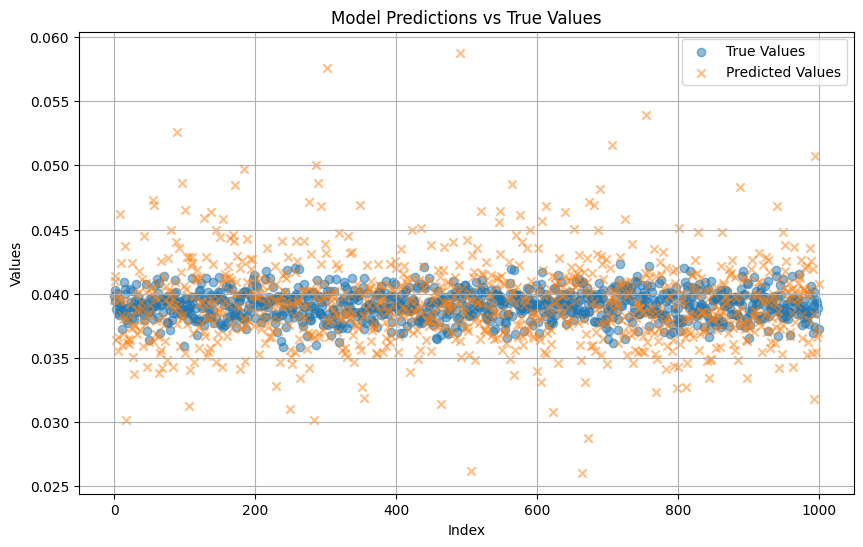

In [174]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions
# y_pred = target_scaler.inverse_transform(y_pred)

# Plot the predictions and true values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, alpha=0.5, label='True Values', marker='o')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, label='Predicted Values', marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Model Predictions vs True Values')
plt.legend()
plt.grid(True)
plt.show()